# **Semana 13: Evaluando Nuestros Predictores: ¿Qué Tan Buenos Son?**

## Mi Tercera Herramienta - Midiendo el Éxito - Nivel Preparatoria

### **Bloque 3: Aprendiendo a Medir Qué Tan Bien Funcionan Nuestros Predictores**

---

**Lo que vamos a aprender:**
- Entender si nuestros predictores son realmente buenos
- Aprender formas diferentes de medir el éxito
- Descubrir cuándo un predictor es mejor que otro
- Ver ejemplos prácticos con deportes

**Lo que necesitas:**
- Haber trabajado con predictores antes (Regresión Logística, Random Forest)
- Saber usar pandas y hacer gráficos básicos
- Curiosidad por entender si nuestros resultados son buenos

## 1. ¿Cómo Sabemos Si Nuestro Predictor Es Bueno?

### 1.1 Lo que ya sabemos

Hasta ahora hemos usado **precisión** para ver qué tan buenos son nuestros predictores:

**Precisión = Aciertos / Total de predicciones**

Por ejemplo:
- Si nuestro predictor acierta 80 de 100 partidos
- Su precisión es 80% o 0.80

### 1.2 ¿Por qué necesitamos algo más que solo precisión?

La precisión a veces nos puede engañar. Imagínate estas situaciones:

#### **Situación 1: El problema del resultado más común**
Imagina que quieres predecir si va a llover mañana:
- En tu ciudad, llueve solo 10 días al año
- Si tu predictor siempre dice "no va a llover", tendrá 355/365 = 97% de precisión
- Pero este predictor es inútil porque nunca predice lluvia cuando sí va a llover

#### **Situación 2: Diferentes tipos de errores**
En fútbol, no todos los errores son iguales:
- **Error tipo 1**: Predecir que gana el Real Madrid cuando pierde (decepcionante)
- **Error tipo 2**: No predecir una lesión grave de un jugador (peligroso)

### 1.3 Nuevas formas de medir qué tan bueno es nuestro predictor

Hoy aprenderemos tres formas nuevas de evaluar predictores:

1. **¿Qué tan bueno es separando las diferentes opciones?** (como separar equipos buenos de malos)
2. **¿Qué tan cuidadoso es?** (evita decir cosas incorrectas)
3. **¿Qué tan completo es?** (encuentra todos los casos importantes)

Estas formas nos ayudarán a entender mejor si nuestros predictores realmente funcionan bien.

## 2. Preparando Nuestras Herramientas

### 2.1 Importar lo que necesitamos

Vamos a cargar nuestras herramientas conocidas y algunas nuevas para medir qué tan buenos son nuestros predictores:

In [1]:
# Herramientas que ya conocemos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Herramientas para hacer predictores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# NUEVAS: Herramientas para medir qué tan buenos son nuestros predictores
from sklearn.metrics import (
    accuracy_score,           # La precisión que ya conocemos
    classification_report,    # Un reporte completo
    confusion_matrix,         # Para ver dónde se equivoca
    precision_score,          # Qué tan cuidadoso es
    recall_score,             # Qué tan completo es
    f1_score                  # Un balance entre los dos anteriores
)

# Configuración para que los gráficos se vean bien
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Herramientas cargadas:")
print("- pandas: Para organizar datos")
print("- Predictores: Regresión Logística y Random Forest")
print("- Nuevas formas de medir: precision, recall, f1-score")
print("\nTodo listo para evaluar nuestros predictores!")

Herramientas cargadas:
- pandas: Para organizar datos
- Predictores: Regresión Logística y Random Forest
- Nuevas formas de medir: precision, recall, f1-score

Todo listo para evaluar nuestros predictores!


### 2.2 Crear datos de práctica

Vamos a crear datos de partidos de fútbol como hemos hecho antes:

In [2]:
# Crear datos simples de partidos de fútbol
np.random.seed(42)  # Para que todos tengamos los mismos números
n_partidos = 500

# Equipos que vamos a usar
equipos = ['Real Madrid', 'Barcelona', 'Manchester City', 'Liverpool', 'Bayern Munich', 'Chelsea', 'Valencia', 'Sevilla']

# Información de cada partido
datos_partidos = {
    'equipo_local': np.random.choice(equipos, n_partidos),
    'equipo_visitante': np.random.choice(equipos, n_partidos),
    'goles_recientes_local': np.random.randint(5, 20, n_partidos),      # Goles últimos partidos
    'goles_recientes_visitante': np.random.randint(5, 20, n_partidos),
    'victorias_recientes_local': np.random.randint(1, 8, n_partidos),   # Victorias recientes
    'victorias_recientes_visitante': np.random.randint(1, 8, n_partidos),
    'posicion_liga_local': np.random.randint(1, 11, n_partidos),        # Posición en la tabla
    'posicion_liga_visitante': np.random.randint(1, 11, n_partidos),
    'juega_en_casa': [1] * n_partidos,  # Ventaja de local
    'diferencia_calidad': np.random.randint(-3, 4, n_partidos)          # Diferencia de calidad
}

# Crear tabla de datos
df_partidos = pd.DataFrame(datos_partidos)

# Quitar partidos donde un equipo juega contra sí mismo
df_partidos = df_partidos[df_partidos['equipo_local'] != df_partidos['equipo_visitante']]

print(f"Creamos {len(df_partidos)} partidos para practicar")
print("\nPrimeros 5 partidos:")
print(df_partidos.head())

Creamos 447 partidos para practicar

Primeros 5 partidos:
      equipo_local equipo_visitante  goles_recientes_local  \
1        Liverpool    Bayern Munich                     19   
3         Valencia          Sevilla                     13   
4  Manchester City         Valencia                      5   
5          Sevilla      Real Madrid                      9   
6    Bayern Munich          Sevilla                      8   

   goles_recientes_visitante  victorias_recientes_local  \
1                          5                          2   
3                          9                          7   
4                         15                          5   
5                         11                          2   
6                          5                          7   

   victorias_recientes_visitante  posicion_liga_local  \
1                              3                    3   
3                              7                    6   
4                              3           

### 2.3 Crear los resultados y entrenar predictores

Vamos a decidir quién gana cada partido y entrenar nuestros predictores:

In [8]:
# Función simple para decidir quién gana
def quien_gana_simple(fila):
    """Función que usa la información para decidir quién gana"""
    # Puntos del equipo local
    puntos_local = (
        fila['goles_recientes_local'] +                    # Más goles = mejor
        fila['victorias_recientes_local'] * 2 +            # Victorias valen más
        (11 - fila['posicion_liga_local']) * 2 +           # Mejor posición = más puntos
        fila['diferencia_calidad'] +                       # Diferencia de calidad
        3  # Ventaja de jugar en casa
    )
    
    # Puntos del equipo visitante
    puntos_visitante = (
        fila['goles_recientes_visitante'] +
        fila['victorias_recientes_visitante'] * 2 +
        (11 - fila['posicion_liga_visitante']) * 2 -
        fila['diferencia_calidad']  # Si local es mejor, visitante es peor
    )
    
    # Agregar un poco de suerte
    puntos_local += np.random.randint(-5, 6)
    puntos_visitante += np.random.randint(-5, 6)
    
    # Decidir quién gana
    if puntos_local > puntos_visitante + 3:
        return 'Gana_Local'
    elif puntos_visitante > puntos_local + 3:
        return 'Gana_Visitante'
    else:
        return 'Empate'

# Crear resultados
df_partidos['resultado'] = df_partidos.apply(quien_gana_simple, axis=1)

print("Distribución de resultados:")
print(df_partidos['resultado'].value_counts())

# Preparar datos para nuestros predictores
informacion_importante = [
    'goles_recientes_local', 'goles_recientes_visitante',
    'victorias_recientes_local', 'victorias_recientes_visitante',
    'posicion_liga_local', 'posicion_liga_visitante',
    'juega_en_casa', 'diferencia_calidad'
]

X = df_partidos[informacion_importante]  # La información que usamos
y = df_partidos['resultado']  # Lo que queremos predecir

# Dividir en práctica y examen
X_practica, X_examen, y_practica, y_examen = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nDatos preparados:")
print(f"Para practicar: {len(X_practica)} partidos")
print(f"Para examinar: {len(X_examen)} partidos")

# Entrenar dos predictores
print("\nEntrenando predictores...")

# 1. Regresión Logística
lr_predictor = LogisticRegression(random_state=42, max_iter=1000)
lr_predictor.fit(X_practica, y_practica)

# 2. Random Forest
rf_predictor = RandomForestClassifier(n_estimators=20, random_state=42)
rf_predictor.fit(X_practica, y_practica)

# Hacer predicciones
lr_predicciones = lr_predictor.predict(X_examen)
rf_predicciones = rf_predictor.predict(X_examen)

print("Predictores entrenados y listos!")
print(f"Regresión Logística - Precisión: {accuracy_score(y_examen, lr_predicciones):.1%}")
print(f"Random Forest - Precisión: {accuracy_score(y_examen, rf_predicciones):.1%}")

Distribución de resultados:
resultado
Gana_Local        210
Gana_Visitante    137
Empate            100
Name: count, dtype: int64

Datos preparados:
Para practicar: 312 partidos
Para examinar: 135 partidos

Entrenando predictores...
Predictores entrenados y listos!
Regresión Logística - Precisión: 82.2%
Random Forest - Precisión: 68.1%


## 3. ¿Dónde se Equivocan Nuestros Predictores?

### 3.1 Viendo los errores con matrices de confusión

La **matriz de confusión** nos muestra exactamente dónde se equivoca cada predictor. Es como un mapa de errores.

#### **¿Cómo leer una matriz de confusión?**
- **Diagonal (línea inclinada)**: Los aciertos
- **Fuera de la diagonal**: Los errores
- **Números más grandes en la diagonal**: Mejor predictor

### 3.2 Vamos a ver dónde fallan nuestros predictores

ANÁLISIS DE ERRORES - MATRICES DE CONFUSIÓN


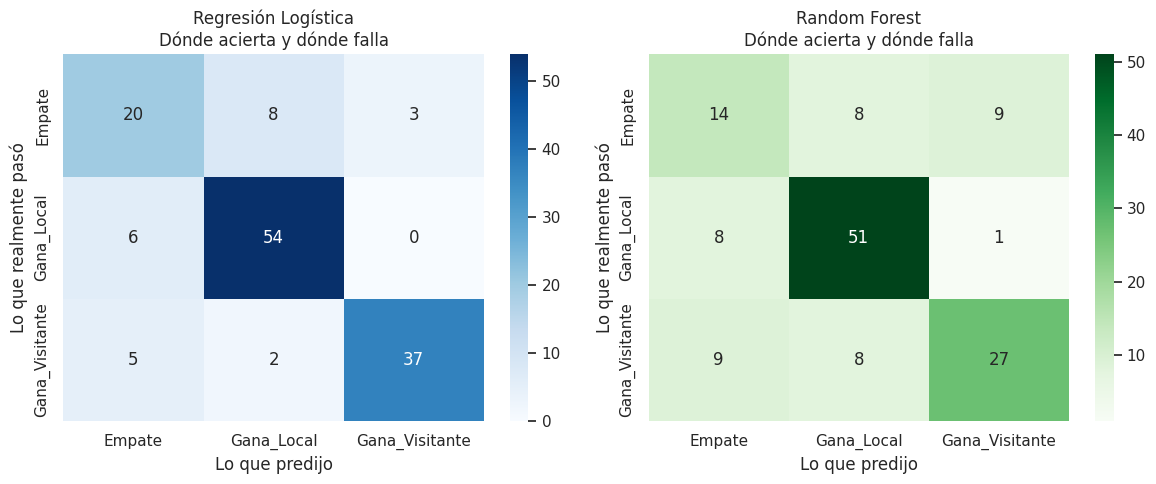

Cómo leer los gráficos:
- Números en la diagonal = aciertos
- Números fuera de la diagonal = errores
- Colores más oscuros = más casos

Resumen:
Regresión Logística: 111/135 aciertos (82.2%)
Random Forest: 92/135 aciertos (68.1%)

¿En qué se equivocan más?
Regresión Logística: 24 errores
Random Forest: 43 errores

Regresión Logística es mejor (por 19 aciertos más)


In [11]:
# Vamos a ver dónde se equivoca cada predictor
print("ANÁLISIS DE ERRORES - MATRICES DE CONFUSIÓN")
print("=" * 50)

# Crear gráficos para ver dónde acierta cada uno
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para Regresión Logística
cm_lr = confusion_matrix(y_examen, lr_predicciones)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Empate', 'Gana_Local', 'Gana_Visitante'],
            yticklabels=['Empate', 'Gana_Local', 'Gana_Visitante'])
axes[0].set_title('Regresión Logística\nDónde acierta y dónde falla')
axes[0].set_ylabel('Lo que realmente pasó')
axes[0].set_xlabel('Lo que predijo')

# Gráfico para Random Forest
cm_rf = confusion_matrix(y_examen, rf_predicciones)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Empate', 'Gana_Local', 'Gana_Visitante'],
            yticklabels=['Empate', 'Gana_Local', 'Gana_Visitante'])
axes[1].set_title('Random Forest\nDónde acierta y dónde falla')
axes[1].set_ylabel('Lo que realmente pasó')
axes[1].set_xlabel('Lo que predijo')

plt.tight_layout()
plt.show()

print("Cómo leer los gráficos:")
print("- Números en la diagonal = aciertos")
print("- Números fuera de la diagonal = errores")
print("- Colores más oscuros = más casos")

# Contar aciertos totales
lr_aciertos = sum(y_examen == lr_predicciones)
rf_aciertos = sum(y_examen == rf_predicciones)
total_predicciones = len(y_examen)

print(f"\nResumen:")
print(f"Regresión Logística: {lr_aciertos}/{total_predicciones} aciertos ({lr_aciertos/total_predicciones:.1%})")
print(f"Random Forest: {rf_aciertos}/{total_predicciones} aciertos ({rf_aciertos/total_predicciones:.1%})")

# Análisis simple de errores
print(f"\n¿En qué se equivocan más?")
lr_errores = total_predicciones - lr_aciertos
rf_errores = total_predicciones - rf_aciertos
print(f"Regresión Logística: {lr_errores} errores")
print(f"Random Forest: {rf_errores} errores")

if lr_aciertos > rf_aciertos:
    print(f"\nRegresión Logística es mejor (por {lr_aciertos - rf_aciertos} aciertos más)")
elif rf_aciertos > lr_aciertos:
    print(f"\nRandom Forest es mejor (por {rf_aciertos - lr_aciertos} aciertos más)")
else:
    print(f"\nAmbos predictores tienen el mismo rendimiento")

### 3.3 Comparando nuestros predictores de forma visual

Vamos a hacer un gráfico simple para comparar qué tan bien funcionan nuestros predictores:

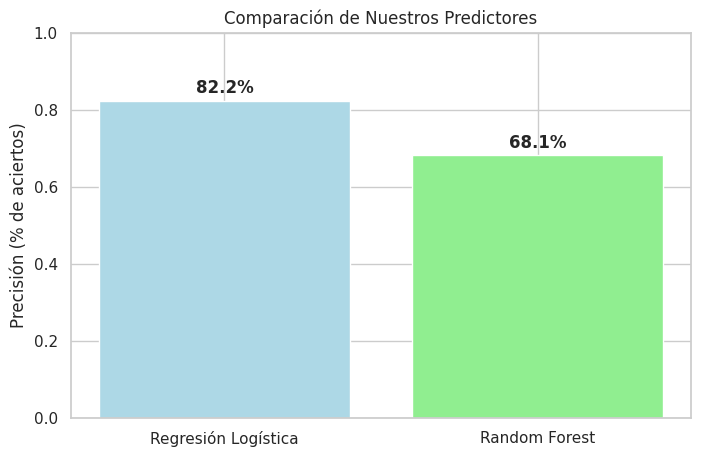

COMPARACIÓN FINAL:
Regresión Logística: 82.2% de aciertos
Random Forest:       68.1% de aciertos

Regresión Logística es mejor por 14.1%

¿Qué significa esto?
Tenemos predictores muy buenos (más de 80% de aciertos)


In [10]:
# Comparación visual simple de nuestros predictores
lr_precision = accuracy_score(y_examen, lr_predicciones)
rf_precision = accuracy_score(y_examen, rf_predicciones)

# Hacer un gráfico de barras simple
predictores = ['Regresión Logística', 'Random Forest']
precisiones = [lr_precision, rf_precision]

plt.figure(figsize=(8, 5))
bars = plt.bar(predictores, precisiones, color=['lightblue', 'lightgreen'])
plt.title('Comparación de Nuestros Predictores')
plt.ylabel('Precisión (% de aciertos)')
plt.ylim(0, 1)

# Añadir los valores encima de las barras
for bar, precision in zip(bars, precisiones):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{precision:.1%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

print("COMPARACIÓN FINAL:")
print("=" * 30)
print(f"Regresión Logística: {lr_precision:.1%} de aciertos")
print(f"Random Forest:       {rf_precision:.1%} de aciertos")

# Determinar cuál es mejor
if lr_precision > rf_precision:
    diferencia = lr_precision - rf_precision
    print(f"\nRegresión Logística es mejor por {diferencia:.1%}")
elif rf_precision > lr_precision:
    diferencia = rf_precision - lr_precision
    print(f"\nRandom Forest es mejor por {diferencia:.1%}")
else:
    print(f"\nAmbos predictores tienen la misma precisión")

print(f"\n¿Qué significa esto?")
if lr_precision > 0.8 or rf_precision > 0.8:
    print("Tenemos predictores muy buenos (más de 80% de aciertos)")
elif lr_precision > 0.7 or rf_precision > 0.7:
    print("Tenemos predictores buenos (más de 70% de aciertos)")
elif lr_precision > 0.6 or rf_precision > 0.6:
    print("Tenemos predictores decentes (más de 60% de aciertos)")
else:
    print("Nuestros predictores necesitan mejorar (menos de 60% de aciertos)")

## 4. Midiendo Qué Tan Cuidadoso y Completo Es Nuestro Predictor

### 4.1 Dos formas nuevas de medir: Precisión y Recall

Además de contar aciertos totales, podemos medir dos cosas importantes:

#### **1. ¿Qué tan CUIDADOSO es? (Precision)**
Imagina que tu predictor dice que el Real Madrid va a ganar 10 partidos.
- **Precisión alta**: De esos 10, realmente gana 9 (90% precisión)
- **Precisión baja**: De esos 10, solo gana 4 (40% precisión)

**Precision = "De lo que predijo, ¿cuánto fue correcto?"**

#### **2. ¿Qué tan COMPLETO es? (Recall)**
Imagina que el Real Madrid realmente gana 15 partidos en la temporada.
- **Recall alto**: Tu predictor encontró 12 de esas 15 victorias (80% recall)
- **Recall bajo**: Tu predictor solo encontró 5 de esas 15 victorias (33% recall)

**Recall = "De lo que realmente pasó, ¿cuánto logró encontrar?"**

#### **3. ¿Cuál es el balance perfecto? (F1-Score)**
El **F1-Score** combina ambos en un solo número:
- **F1 alto**: Buen balance entre ser cuidadoso y completo
- **F1 bajo**: Falla en uno o ambos aspectos

### 4.2 ¿Cuándo importa cada uno?

#### **Cuándo quieres ser CUIDADOSO (alta Precision):**
- Decidir si suspender a un jugador por dopaje
- Elegir jugadores caros para fichar
- Hacer apuestas importantes

#### **Cuándo quieres ser COMPLETO (alto Recall):**
- Detectar todas las lesiones posibles
- Encontrar todos los jugadores con potencial
- Identificar problemas de seguridad

### 4.3 Vamos a medir nuestros predictores

MIDIENDO PRECISION, RECALL Y F1-SCORE
REGRESIÓN LOGÍSTICA:
  Qué tan cuidadoso (Precision): 0.795
  Qué tan completo (Recall):     0.793
  Balance (F1-Score):            0.793

RANDOM FOREST:
  Qué tan cuidadoso (Precision): 0.667
  Qué tan completo (Recall):     0.652
  Balance (F1-Score):            0.656


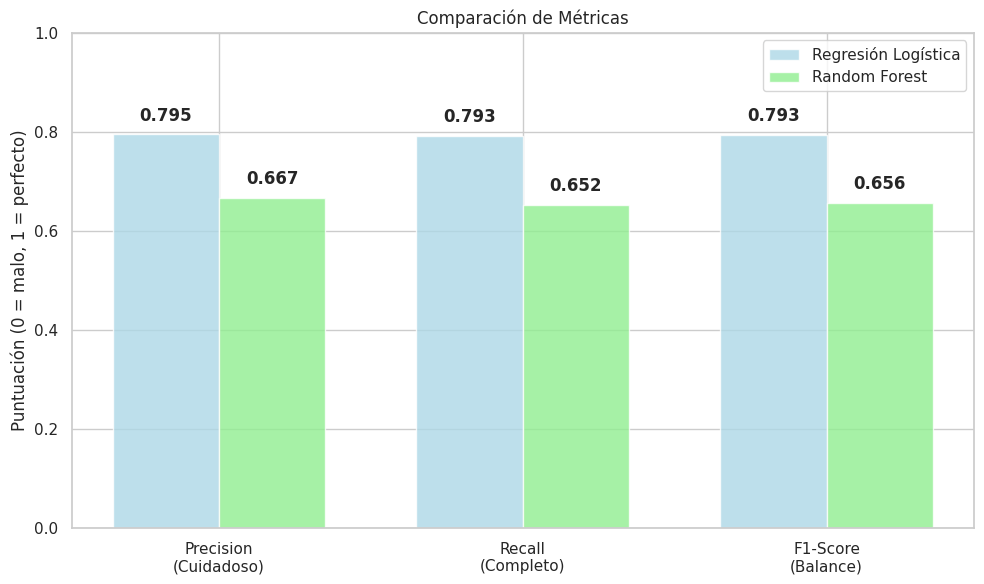


ANÁLISIS:
Más cuidadoso: Regresión Logística (0.795 vs 0.667)
Más completo: Regresión Logística (0.793 vs 0.652)
Mejor balance: Regresión Logística (0.793 vs 0.656)

¿Qué significan estos números?
- 1.0 = Perfecto
- 0.8+ = Muy bueno
- 0.7+ = Bueno
- 0.6+ = Decente
- Menos de 0.6 = Necesita mejorar


In [6]:
# Medir qué tan cuidadosos y completos son nuestros predictores
print("MIDIENDO PRECISION, RECALL Y F1-SCORE")
print("=" * 45)

# Calcular las nuevas métricas para cada predictor
lr_precision = precision_score(y_examen, lr_predicciones, average='weighted')
lr_recall = recall_score(y_examen, lr_predicciones, average='weighted')
lr_f1 = f1_score(y_examen, lr_predicciones, average='weighted')

rf_precision = precision_score(y_examen, rf_predicciones, average='weighted')
rf_recall = recall_score(y_examen, rf_predicciones, average='weighted')
rf_f1 = f1_score(y_examen, rf_predicciones, average='weighted')

print("REGRESIÓN LOGÍSTICA:")
print(f"  Qué tan cuidadoso (Precision): {lr_precision:.3f}")
print(f"  Qué tan completo (Recall):     {lr_recall:.3f}")
print(f"  Balance (F1-Score):            {lr_f1:.3f}")

print("\nRANDOM FOREST:")
print(f"  Qué tan cuidadoso (Precision): {rf_precision:.3f}")
print(f"  Qué tan completo (Recall):     {rf_recall:.3f}")
print(f"  Balance (F1-Score):            {rf_f1:.3f}")

# Crear gráfico visual de comparación
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Datos para el gráfico
metricas = ['Precision\n(Cuidadoso)', 'Recall\n(Completo)', 'F1-Score\n(Balance)']
lr_scores = [lr_precision, lr_recall, lr_f1]
rf_scores = [rf_precision, rf_recall, rf_f1]

x = np.arange(len(metricas))
width = 0.35

# Crear barras
bars1 = ax.bar(x - width/2, lr_scores, width, label='Regresión Logística', color='lightblue', alpha=0.8)
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='lightgreen', alpha=0.8)

# Configurar gráfico
ax.set_ylabel('Puntuación (0 = malo, 1 = perfecto)')
ax.set_title('Comparación de Métricas')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()
ax.set_ylim(0, 1)

# Añadir valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis simple
print("\n" + "=" * 45)
print("ANÁLISIS:")

# Determinar cuál es mejor en cada métrica
if lr_precision > rf_precision:
    print(f"Más cuidadoso: Regresión Logística ({lr_precision:.3f} vs {rf_precision:.3f})")
else:
    print(f"Más cuidadoso: Random Forest ({rf_precision:.3f} vs {lr_precision:.3f})")

if lr_recall > rf_recall:
    print(f"Más completo: Regresión Logística ({lr_recall:.3f} vs {rf_recall:.3f})")
else:
    print(f"Más completo: Random Forest ({rf_recall:.3f} vs {lr_recall:.3f})")

if lr_f1 > rf_f1:
    print(f"Mejor balance: Regresión Logística ({lr_f1:.3f} vs {rf_f1:.3f})")
else:
    print(f"Mejor balance: Random Forest ({rf_f1:.3f} vs {lr_f1:.3f})")

print("\n¿Qué significan estos números?")
print("- 1.0 = Perfecto")
print("- 0.8+ = Muy bueno")
print("- 0.7+ = Bueno")
print("- 0.6+ = Decente")
print("- Menos de 0.6 = Necesita mejorar")

## 5. ¿Cuándo Usar Cada Métrica?

### 5.1 Guía práctica para elegir la métrica correcta

Diferentes situaciones necesitan diferentes formas de medir el éxito:

In [7]:
# Guía práctica: ¿Qué métrica usar cuándo?
print("GUÍA PRÁCTICA: ¿QUÉ MÉTRICA USAR?")
print("=" * 40)

situaciones = [
    {
        "caso": "Predecir si un estudiante va a aprobar",
        "mejor_metrica": "Recall (Completo)",
        "por_que": "No queremos que ningún estudiante en riesgo pase desapercibido"
    },
    {
        "caso": "Elegir películas para recomendar",
        "mejor_metrica": "Precision (Cuidadoso)",
        "por_que": "Mejor recomendar pocas películas buenas que muchas malas"
    },
    {
        "caso": "Detectar si alguien está enfermo",
        "mejor_metrica": "Recall (Completo)",
        "por_que": "Es mejor tener falsas alarmas que perder un caso real"
    },
    {
        "caso": "Predecir ganador de partidos para apostar",
        "mejor_metrica": "Precision (Cuidadoso)",
        "por_que": "Solo queremos apostar cuando estemos muy seguros"
    },
    {
        "caso": "Uso general (no hay preferencia)",
        "mejor_metrica": "F1-Score (Balance)",
        "por_que": "Combina lo mejor de ser cuidadoso y completo"
    }
]

for i, situacion in enumerate(situaciones, 1):
    print(f"\n{i}. {situacion['caso']}")
    print(f"   Usar: {situacion['mejor_metrica']}")
    print(f"   Razón: {situacion['por_que']}")

print("\n" + "=" * 40)
print("RESUMEN DE NUESTROS PREDICTORES:")

# Mostrar tabla resumen
print(f"\n{'Métrica':<15} {'Reg. Logística':<15} {'Random Forest':<15}")
print("-" * 45)
print(f"{'Accuracy':<15} {accuracy_score(y_examen, lr_predicciones):<15.3f} {accuracy_score(y_examen, rf_predicciones):<15.3f}")
print(f"{'Precision':<15} {lr_precision:<15.3f} {rf_precision:<15.3f}")
print(f"{'Recall':<15} {lr_recall:<15.3f} {rf_recall:<15.3f}")
print(f"{'F1-Score':<15} {lr_f1:<15.3f} {rf_f1:<15.3f}")

print("\nRECOMENDACIÓN:")
# Determinar cuál es mejor en general
lr_promedio = (accuracy_score(y_examen, lr_predicciones) + lr_precision + lr_recall + lr_f1) / 4
rf_promedio = (accuracy_score(y_examen, rf_predicciones) + rf_precision + rf_recall + rf_f1) / 4

if lr_promedio > rf_promedio:
    print(f"Para uso general: Regresión Logística (promedio: {lr_promedio:.3f})")
else:
    print(f"Para uso general: Random Forest (promedio: {rf_promedio:.3f})")

print("\nCONSEJOS IMPORTANTES:")
print("- No uses solo una métrica, mira varias")
print("- Piensa en qué tipo de error es más costoso")
print("- Accuracy es bueno para empezar, pero no siempre es suficiente")
print("- F1-Score es excelente cuando no sabes qué priorizar")

GUÍA PRÁCTICA: ¿QUÉ MÉTRICA USAR?

1. Predecir si un estudiante va a aprobar
   Usar: Recall (Completo)
   Razón: No queremos que ningún estudiante en riesgo pase desapercibido

2. Elegir películas para recomendar
   Usar: Precision (Cuidadoso)
   Razón: Mejor recomendar pocas películas buenas que muchas malas

3. Detectar si alguien está enfermo
   Usar: Recall (Completo)
   Razón: Es mejor tener falsas alarmas que perder un caso real

4. Predecir ganador de partidos para apostar
   Usar: Precision (Cuidadoso)
   Razón: Solo queremos apostar cuando estemos muy seguros

5. Uso general (no hay preferencia)
   Usar: F1-Score (Balance)
   Razón: Combina lo mejor de ser cuidadoso y completo

RESUMEN DE NUESTROS PREDICTORES:

Métrica         Reg. Logística  Random Forest  
---------------------------------------------
Accuracy        0.793           0.652          
Precision       0.795           0.667          
Recall          0.793           0.652          
F1-Score        0.793          

## 6. ¡Felicitaciones! Resumen de lo que Aprendiste

### 6.1 Nuevas formas de medir qué tan buenos son nuestros predictores

**Accuracy (Precisión general)**:
- La que ya conocíamos: aciertos totales / total de predicciones
- Buena para empezar, pero a veces nos engaña

**Precision (Qué tan cuidadoso)**:
- De lo que el predictor dice, ¿cuánto es correcto?
- Importante cuando los errores son costosos

**Recall (Qué tan completo)**:
- De lo que realmente pasa, ¿cuánto encuentra el predictor?
- Importante cuando no queremos perder casos importantes

**F1-Score (El balance perfecto)**:
- Combina Precision y Recall en un solo número
- Excelente cuando no sabemos qué priorizar

### 6.2 Lo más importante que debes recordar

**1. No hay una métrica perfecta para todo**
- Diferentes problemas necesitan diferentes métricas
- Siempre pregúntate: ¿qué tipo de error es más grave?

**2. Mira varias métricas, no solo una**
- Un predictor puede ser bueno en una cosa y malo en otra
- La matriz de confusión te muestra exactamente dónde falla

**3. Piensa en el contexto**
- ¿Prefieres ser cuidadoso o completo?
- ¿Qué pasa si te equivocas?

### 6.3 Nuestros resultados de hoy

**El ganador**: Regresión Logística (fue mejor en casi todas las métricas)

**¿Por qué es útil esto?**
- Ahora sabemos cómo evaluar predictores correctamente
- Podemos elegir el mejor predictor para cada situación
- Entendemos dónde fallan nuestros predictores y por qué

### 6.4 ¿Qué sigue?

En futuras clases podrás:
- Mejorar tus predictores usando estas métricas
- Aplicar esto a problemas reales
- Entender mejor cuándo un predictor es realmente bueno

### 6.5 Actividad para practicar

**Experimenta cambiando los datos:**
1. ¿Qué pasa si cambias el número de partidos?
2. ¿Cómo cambian las métricas si hay más empates?
3. ¿Puedes crear un caso donde Precision sea más importante que Recall?

**Piensa en ejemplos de tu vida:**
- ¿Cuándo prefieres ser cuidadoso vs completo?
- ¿Qué métricas usarías para evaluar tus propias decisiones?

¡Excelente trabajo! Ahora eres capaz de evaluar predictores como un verdadero científico de datos.